<a href="https://colab.research.google.com/github/klklgooa/MachineLearning/blob/main/%EA%B3%BC%EC%A0%9C1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 **전처리**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# 타이타닉 데이터 읽어 들이기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/data/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/data/titanic/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/data/titanic/gender_submission.csv')
result = pd.merge(test,gender_submission) # 두 데이터의 공통 열이름(Passenger)을 기준으로 교집합 조인을 하여 df리턴
titanic = pd.concat([train,result]) #두 df 이어붙이기(병합)
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0 #Sex가 male이면 0으로 치환 (딥러닝을 위해 Sex 속성 숫자로 변환)
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1 #Sex가 female이면 1로 치환
titanic = titanic.fillna(0) #Nan 값을 0으로 바꾸기.

import numpy as np
titanic_input = titanic[['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].to_numpy() #데이터프레임을 넘파이로 바꿈.
#'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare' 빼고 나머지 속성들은 생존여부와 관련없다고 판단
titanic_target = titanic['Survived'].to_numpy()
print(titanic)
# #passenger, survived,    Pclass,        Name, Sex, Age, SibSp,  Parch,  Ticket,  Fare, Cabin, Embarked
# #승객번호,  0사망/1생존, 티켓클래스1/2/3                형제 수 부모 수 티켓번호 표값  객실   하역항

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
413        

In [3]:
# import pandas as pd

# # 타이타닉 데이터 읽어 들이기
# titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/data/titanic.csv')
# titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0 #Sex가 male이면 0으로 치환
# titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1 #Sex가 female이면 1로 치환
# titanic = titanic.fillna(0) #Nan 값을 0으로 바꾸기.
# titanic_input = titanic[['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].to_numpy() #데이터프레임을 넘파이로 바꿈.
# titanic_target = titanic['Survived'].to_numpy()
# print(titanic)
# #passenger, survived,    Pclass,        Name, Sex, Age, SibSp,  Parch,  Ticket,  Fare, Cabin, Embarked
# #승객번호,  0사망/1생존, 티켓클래스1/2/3                형제 수 부모 수 티켓번호 표값  객실   하역항

#SGD분류

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    titanic_input, titanic_target, random_state=202139832)

In [5]:
from sklearn.preprocessing import StandardScaler #특성을 표준화 전처리하여 특성값의 스케일을 맞춤

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=202139832) #매개변수 설정
sc.fit(train_scaled, train_target) #훈련

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.855249745158002
0.8597560975609756


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# **릿지, 라쏘**

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.5168364932556273


In [9]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [10]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
#alpha_list = [1000, 3000, 5000, 7000, 9000, 11000]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

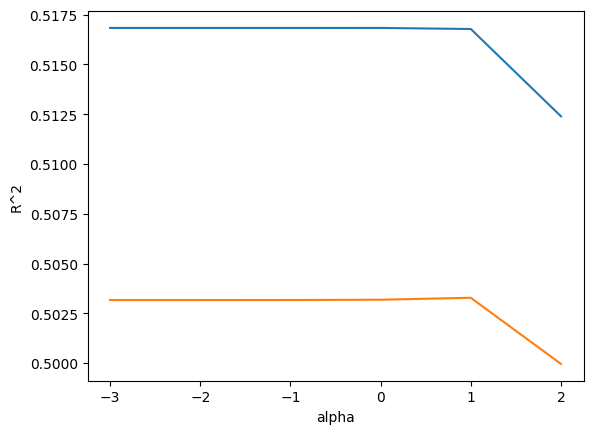

In [11]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [12]:
ridge = Ridge(alpha=10) #0.1, 0.2, 0.3 안됨
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.5167829103685376
0.5032826281500637


In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.0


In [14]:
print(lasso.score(test_scaled, test_target))

-0.00852131945436474


In [15]:
train_score = []
test_score = []

alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

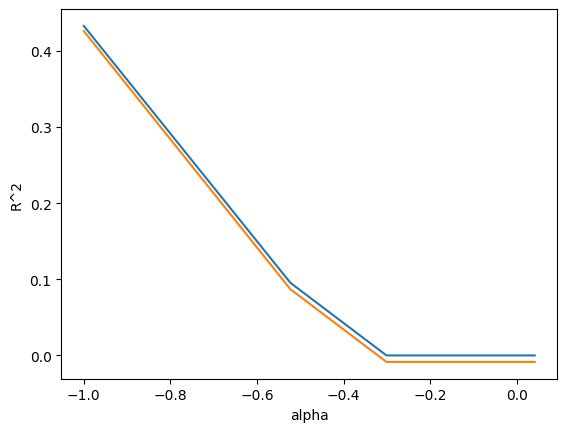

In [16]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [17]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.4329430479756923
0.42617227365601695


In [18]:
print(np.sum(lasso.coef_ == 0))

4


# **결정트리**

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202139832)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) #과대적합.

0.9775739041794088
0.7957317073170732


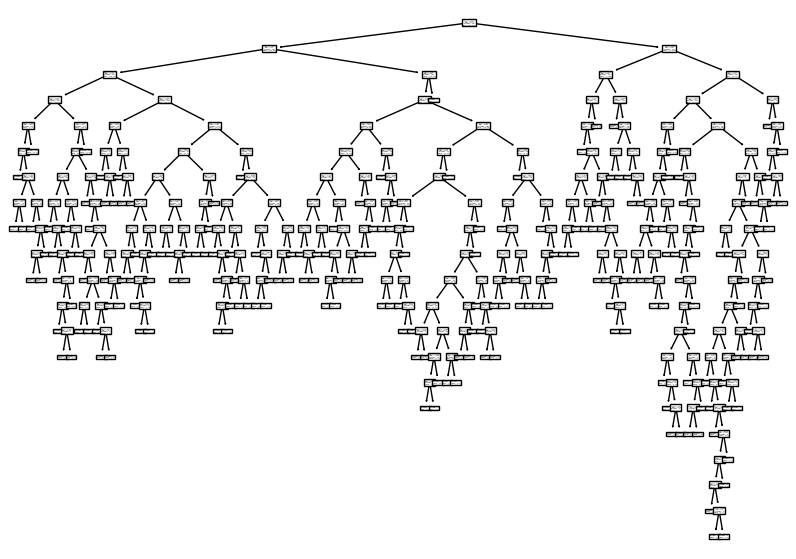

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

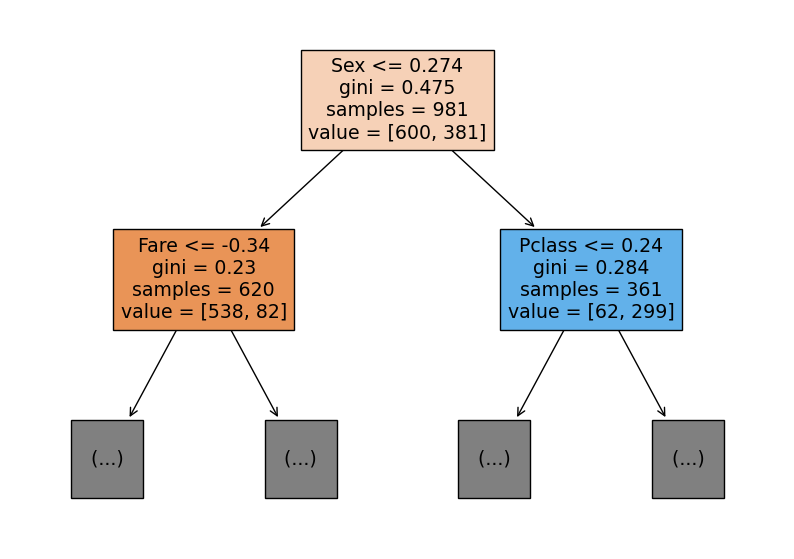

In [28]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])  #max_depth 트리 레벨
plt.show()

In [34]:
dt = DecisionTreeClassifier(max_depth=3, random_state=202139832)
dt.fit(train_input, train_target) #정규화 안된 값.

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8705402650356778
0.8567073170731707


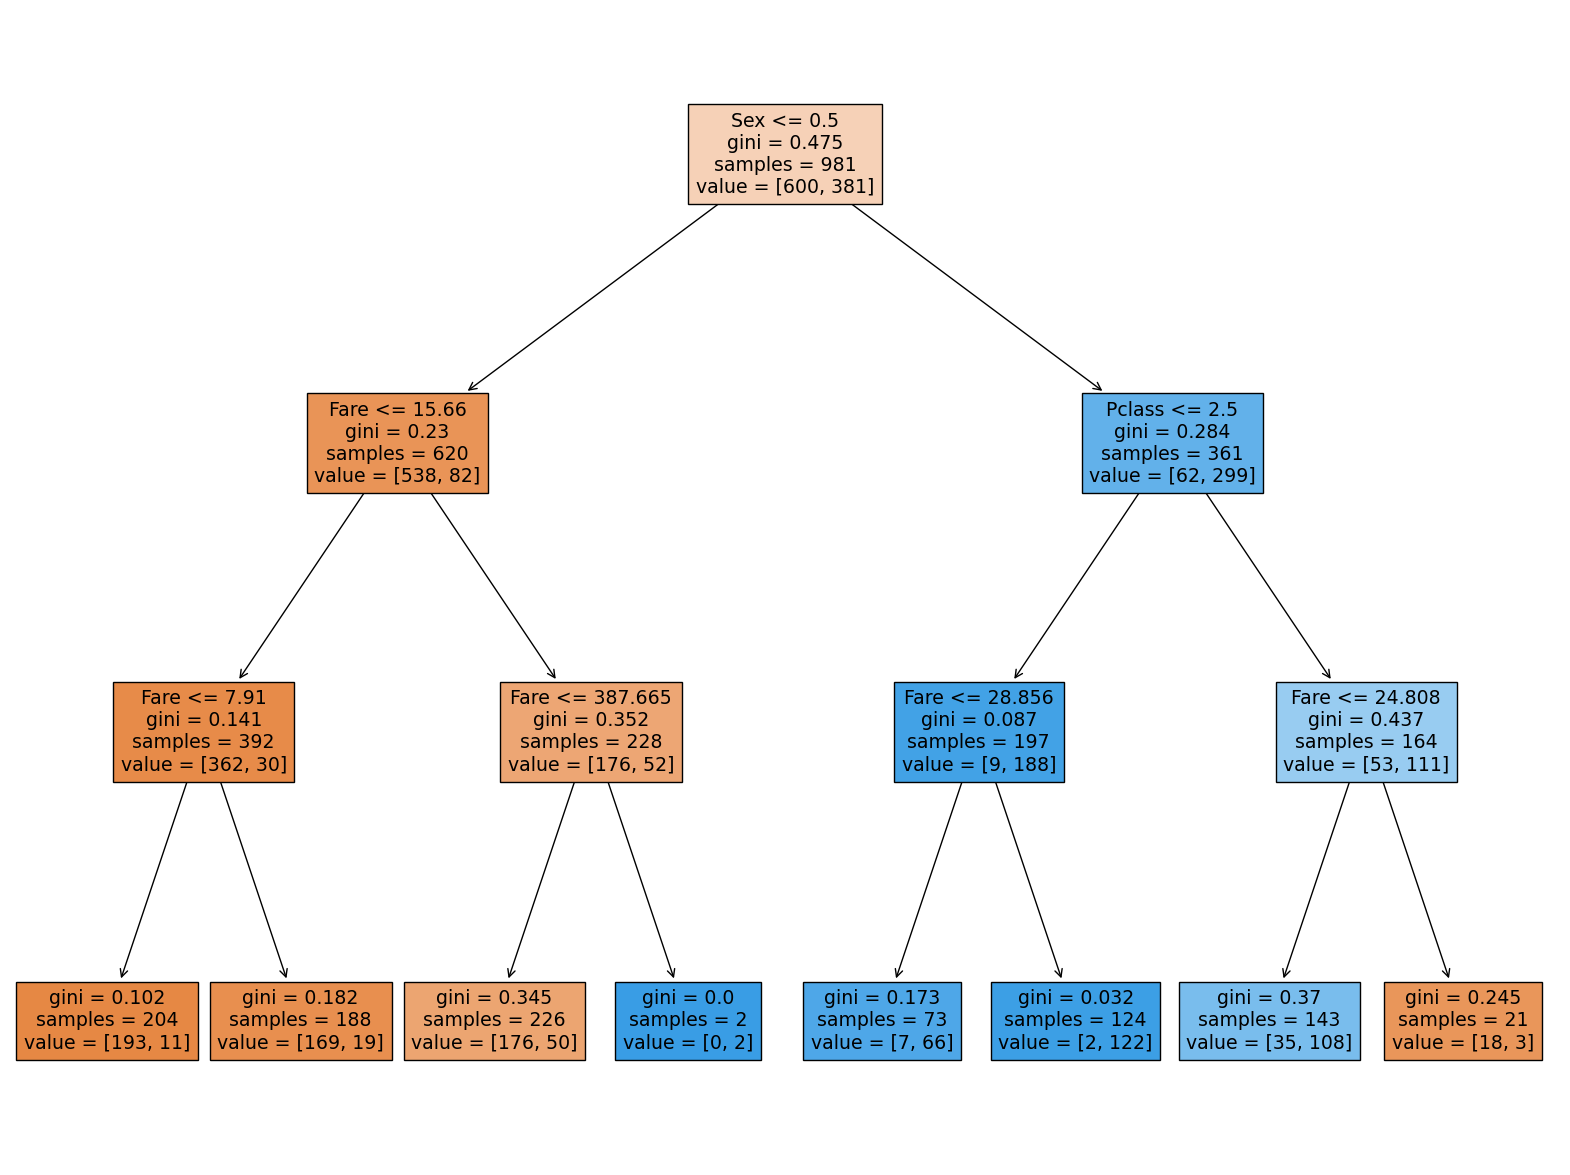

In [36]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [37]:
print(dt.feature_importances_) #특성 중요도에 Sex, Pclass, Fare이 높게 나오는 경향이 있음

[0.85475452 0.         0.05329425 0.         0.         0.09195123]


In [38]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [39]:
print(train_poly.shape)
dt.fit(train_poly, train_target)
print(dt.score(train_poly, train_target))
print(dt.score(test_poly, test_target)) #과대적합 -> 해결책(규제)

(981, 461)
0.8715596330275229
0.8536585365853658


In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# **랜덤포레스트**

In [57]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=202139832) #n_jobs=-1 모든 cpu 코어 사용
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) #교차검증 수행

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9803779409853114 0.8450792499741013


In [58]:
rf.fit(train_input, train_target)
print(rf.feature_importances_) #특성 중요도 출력
#Sex, Pclass의 중요도 감소, Parch, Fare가 상승 -> 특성의 일부를 랜덤하게 선택하여 결정트리를 훈련, 몇가지 특성에 집중하지 않고 더 많은 특성을 훈련
#과대적합을 줄이고 일반화 성능 강화를 위함.

[0.4234732  0.2086474  0.04985129 0.04448688 0.03778685 0.23575437]


In [59]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=202139832) #OOB(out of bag) 샘플: 결정 트리 훈련 시 부트스트랩 샘플에 포함되지 않고 남는 샘플

rf.fit(train_input, train_target)
print(rf.oob_score_)
#OOB 를 사용하여 부트스트랩 샘플로 훈련한 결정트리를 평가.

0.8481141692150866


# **그래디언트 부스팅**

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=202139832)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.912590991810737 0.8644411063917954


In [61]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=202139832)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9785938515533601 0.829762768051383


In [62]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.57745317 0.13751963 0.03954764 0.02811529 0.0184062  0.19895808]


In [63]:
gb.score(test_input, test_target)

0.8475609756097561

# **히스토그램 기반 부스팅**

In [64]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202139832)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score'])) #과대적합

0.9541290783829455 0.8450688905003625


In [65]:
from sklearn.inspection import permutation_importance
#특성을 하나씩랜덤하게 섞어서 모델의 성능 변화를 관찰하여 어떤 특성이 중요한지 계산함

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=202139832, n_jobs=-1)
print(result.importances_mean)
#trainset 특성 중요도 계산.

[0.31671764 0.0814475  0.04036697 0.01651376 0.00958206 0.0853211 ]


In [66]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=202139832, n_jobs=-1)
print(result.importances_mean)
#testset 특성 중요도 계산.

[ 0.2625      0.0277439   0.03323171  0.00457317 -0.00823171  0.01707317]


In [67]:
hgb.score(test_input, test_target)

0.8597560975609756